## Install

In [0]:
!pip install futures
!pip install morfessor
!pip install pyicu
!pip install pycld2

In [0]:
!pip install polyglot

In [0]:
!polyglot download sentiment2.pl

In [0]:
import polyglot

## Load data


In [65]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving GoTracz.txt to GoTracz.txt
Saving KatarzynaObara.txt to KatarzynaObara.txt
Saving martalempart.txt to martalempart.txt
Saving MichalakJerzy.txt to MichalakJerzy.txt
Saving RozeckaPL.txt to RozeckaPL.txt
User uploaded file "GoTracz.txt" with length 1232082 bytes
User uploaded file "KatarzynaObara.txt" with length 543180 bytes
User uploaded file "martalempart.txt" with length 5230764 bytes
User uploaded file "MichalakJerzy.txt" with length 673981 bytes
User uploaded file "RozeckaPL.txt" with length 189495 bytes


## Import

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import datetime
import re

## Read data from file

In [0]:
def read_tweets(file_name):
    data = []
    file = open(file_name, 'r') 
    for line in file:
        try:
            tweet = json.loads(line)
            data.append(tweet)
        except:
            continue
    return data

## Visualisation

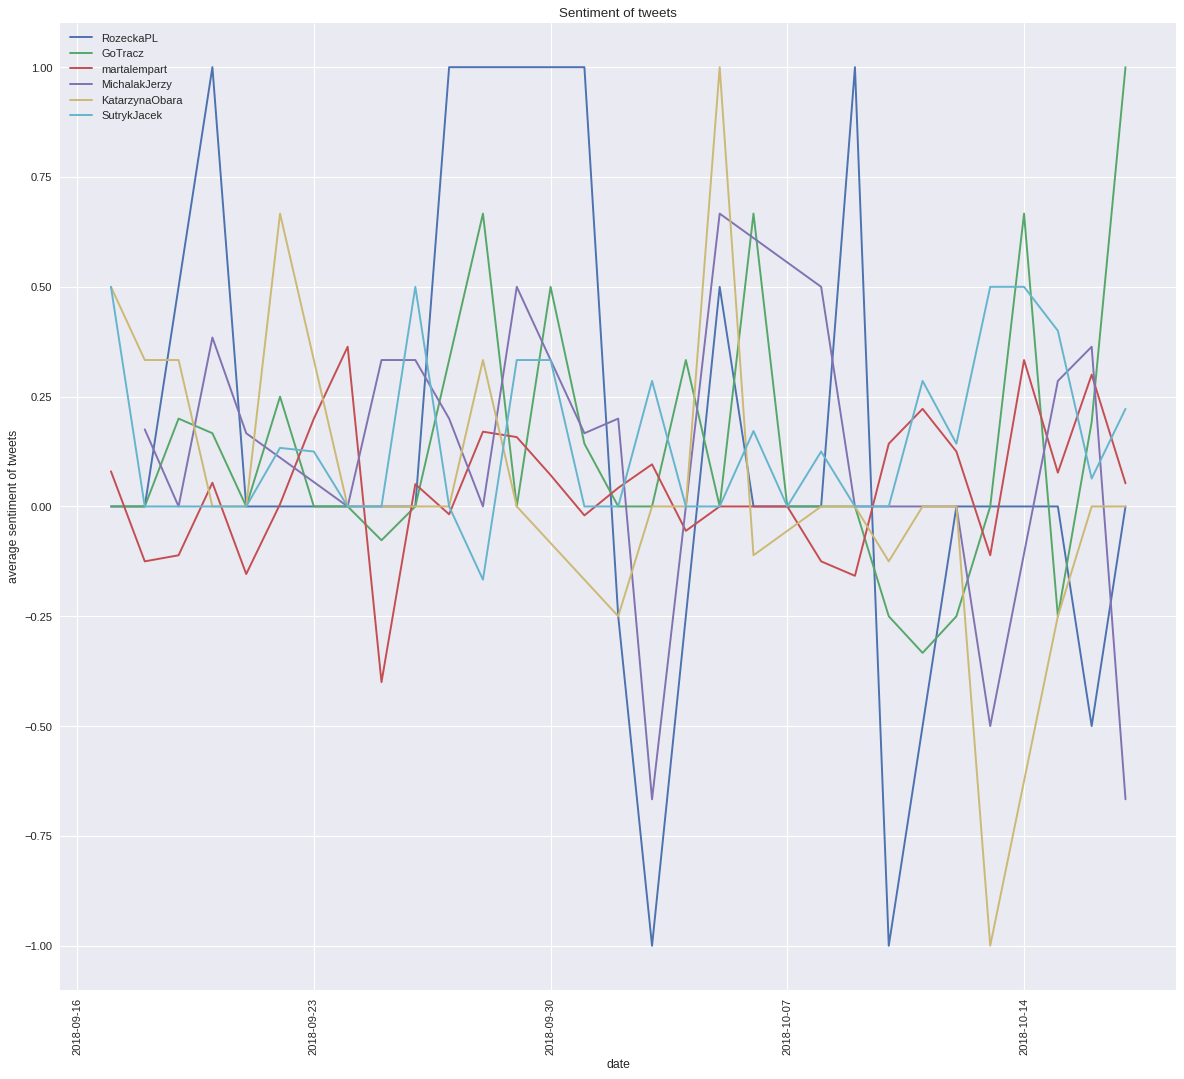

In [66]:
matplotlib.rcParams.update({'font.size': 18})

candidates = ['RozeckaPL','GoTracz','martalempart','MichalakJerzy','KatarzynaObara','SutrykJacek']

fig=plt.figure(figsize=(18, 16), dpi= 80)

plt.title('Sentiment of tweets')
plt.ylabel('average sentiment of tweets')
plt.xlabel('date')
plt.xticks(rotation=90)

for candidate in candidates:
    l = read_tweets(candidate + '.txt')
    df = convert_list_to_df(l)
    df = clear_text(df)
    df = set_tweets_polarity(df)
              
    s = df.groupby('date').mean()['polarity']
    
    plt.plot(s, label=candidate)

plt.legend()   
plt.show()

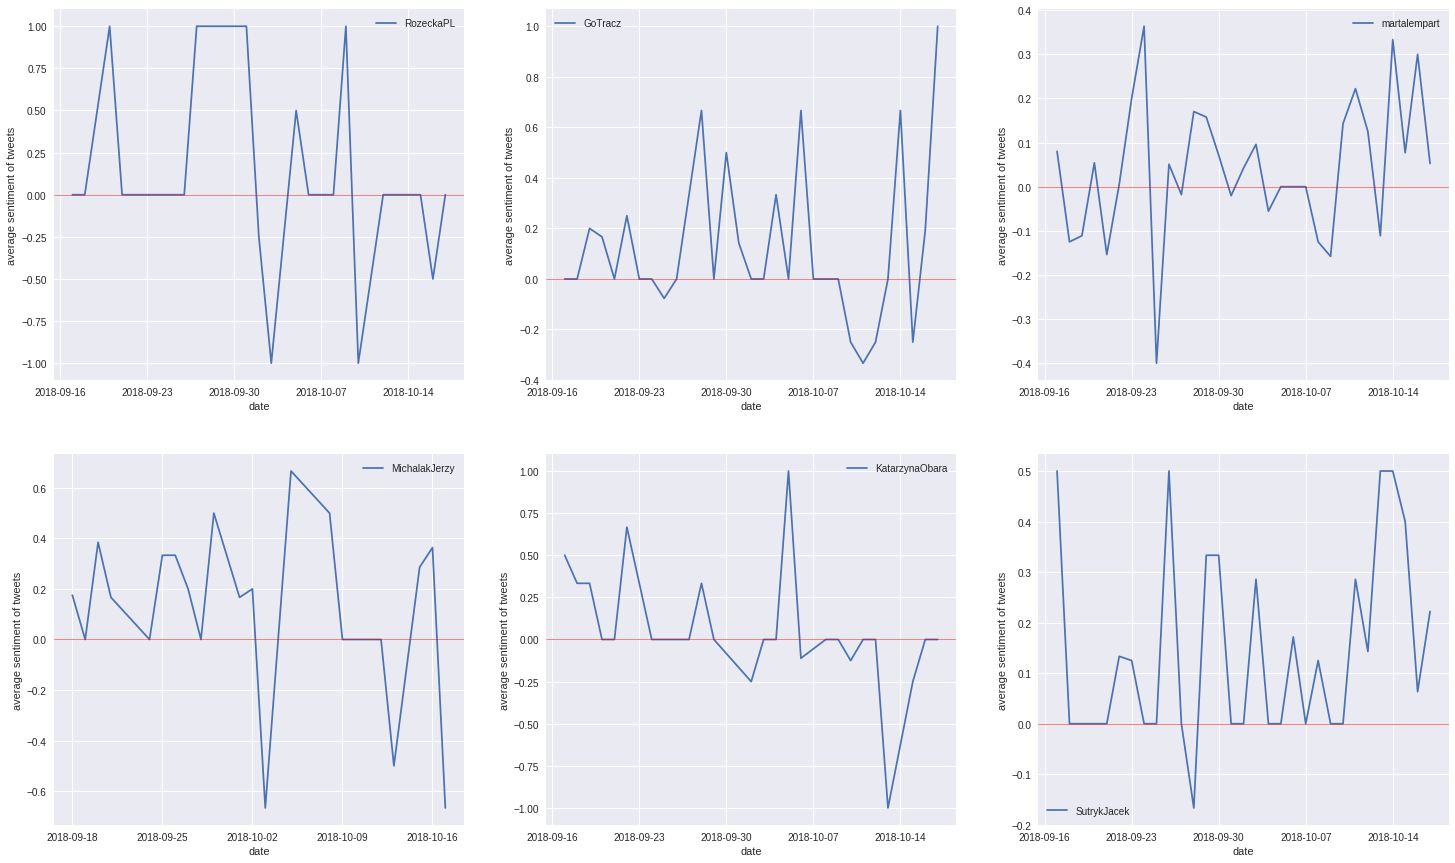

In [103]:
matplotlib.rcParams.update({'font.size': 18})

candidates = {'RozeckaPL':(0,0),'GoTracz':(0,1),'martalempart':(0,2),'MichalakJerzy':(1,0),'KatarzynaObara':(1,1),'SutrykJacek':(1,2)}

fig, axs = plt.subplots(2, 3, figsize=(25, 15))

for candidate in candidates.keys():
    l = read_tweets(candidate + '.txt')
    df = convert_list_to_df(l)
    df = clear_text(df)
    df = set_tweets_polarity(df)
              
    s = df.groupby('date').mean()['polarity']
    
    i, j = candidates[candidate]
    axs[i,j].plot(s, label = candidate)
    axs[i,j].set_ylabel('average sentiment of tweets')
    axs[i,j].set_xlabel('date')
    axs[i,j].legend()  
    axs[i,j].axhline(linewidth=0.5, color='r')

    
plt.show()

In [13]:
data_l = read_tweets('SutrykJacek.txt')
data_l[0]['text']

'#KierunekPrzygoda dziękuję Wam za dobre słowo! 😊💪🏻 Robicie wspaniale rzeczy i róbcie je jak najdłużej! 😊 Bo wszystk… https://t.co/1q8Uqwb55v'

In [0]:
def map_month(month_name):
    switcher = {
        'Sep': '09',
        'Oct': '10',
    }
    return switcher.get(month_name)

def get_date_time_from_string(text):
    # 'Wed Oct 17 11:17:53 +0000 2018'
    data = text.split()
    time = data[3]
    date= datetime.date(int(data[5]), int(map_month(data[1])), int(data[2]))
    return date, time

In [0]:
def convert_list_to_df(tweets):
    data = {'date': [], 'time': [], 'retweeted': [], 'text': []}
    dates, times, retweeted, text = [], [], [], []
    
    for tweet in tweets:
        date, time = get_date_time_from_string(tweet['created_at'])
        dates.append(date)
        times.append(time)
        retweeted.append(False if tweet.get('retweeted_status')==None else True)
        text.append(tweet.get('text'))
        
    data['date'] = dates
    data['time'] = times
    data['retweeted'] = retweeted
    data['text'] = text
    
    return pd.DataFrame.from_dict(data)

In [0]:
def get_cleared_text(text):
  #remove emoji
  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)
  
  #remove links
  return re.sub(r"http\S+", "", text)

In [0]:
from polyglot.text import Text, Word

def clear_text(df):
  for i in df.index:
    df.at[i, 'text'] = get_cleared_text(df.at[i,'text'])
    
  return df

def get_text_polarity(text):
  try:
    polarity = Text(text, hint_language_code="pl").polarity
  except ZeroDivisionError:
    polarity = 0
  
  return polarity
  
def set_tweets_polarity(df):
  polarities = []
  for index, row in df.iterrows():
    polarities.append(get_text_polarity(row['text']))
    
  df['polarity'] = pd.Series(polarities)
  
  return df

In [50]:
downloader.supported_tasks(lang="pl")

['sgns2',
 'unipos',
 'ner2',
 'counts2',
 'transliteration2',
 'embeddings2',
 'uniemb',
 'sentiment2',
 'tsne2',
 'morph2']